In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('BX_Books.csv', sep=';', on_bad_lines='skip', encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [3]:
users = pd.read_csv('BX-Users.csv', sep=';', on_bad_lines='skip', encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [4]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', on_bad_lines='skip', encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [5]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


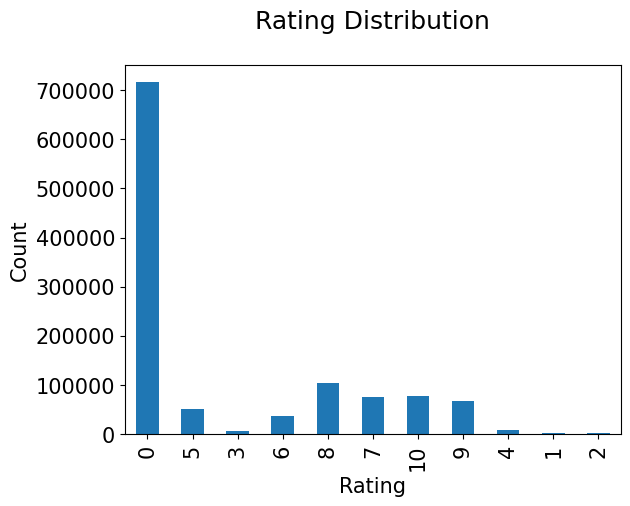

In [6]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [7]:
print(books.shape)
print(list(books.columns))

(271379, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [8]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


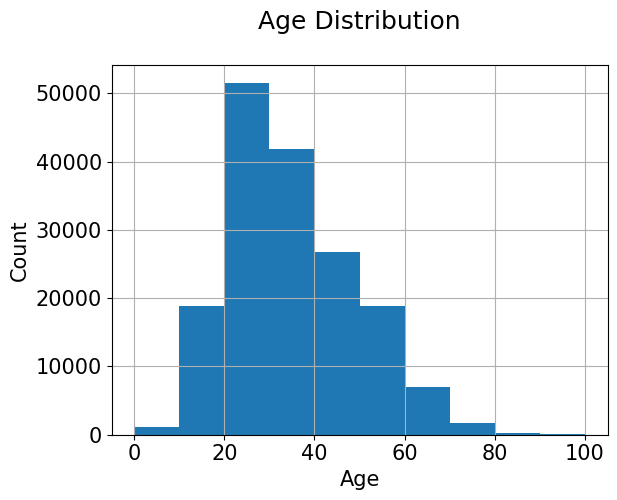

In [9]:
plt.rc("font", size=15)
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [11]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
delete_columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(delete_columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook
2,277427,003008685X,8,Pioneers
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)"
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels)


In [12]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.groupby(by = ['bookTitle'])['bookRating'].count().reset_index().rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [13]:
rating_with_totalRatingCount = pd.merge(combine_book_rating, book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,7
2,277427,003008685X,8,Pioneers,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),13


In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160587.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [15]:
book_ratingCount['totalRatingCount'].quantile(np.arange(0.9,1,0.01))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64

In [16]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,133
15,277427,0060934417,0,Bel Canto: A Novel,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108
24,277427,006440188X,0,The Secret Garden,79


In [17]:
combined = pd.merge(rating_popular_book, users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa"
2,277427,0060934417,0,Bel Canto: A Novel,108,"gilbert, arizona, usa"
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108,"gilbert, arizona, usa"
4,277427,006440188X,0,The Secret Garden,79,"gilbert, arizona, usa"


In [18]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


In [19]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
print(us_canada_user_rating_pivot.index[query_index])
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

625
The Prince of Tides
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  5.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. 10.  0.  0.  0.  0.  9.  8.  0.  9.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. 

In [20]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'Recommendations for {us_canada_user_rating_pivot.index[query_index]}:\n')
    else:
        print(f'{i}: {us_canada_user_rating_pivot.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]}:')

Recommendations for The Prince of Tides:

1: The Eight, with distance of 0.7990415561419655:
2: The Amazing Adventures of Kavalier & Clay, with distance of 0.7994127843306396:
3: The Handmaid's Tale, with distance of 0.8004240532175858:
4: Turtle Moon, with distance of 0.8005035944970242:
5: The Alibi, with distance of 0.8058159414003465:


In [21]:
combine_book_rating = pd.merge(ratings, books, on='ISBN') 

In [22]:
ratings_unique = combine_book_rating.drop_duplicates(subset=['bookTitle', 'userID'])

matrix = ratings_unique.pivot(index='bookTitle', columns='userID', values='bookRating').fillna(0).values

total_elements = matrix.size
non_zero_elements = np.count_nonzero(matrix)
sparsity = 1 - (non_zero_elements / total_elements)

print(f"Sparsity of initial matrix: {sparsity:.2%}")

Sparsity of initial matrix: 99.92%


In [24]:
matrix = us_canada_user_rating_pivot

total_elements = matrix.size
non_zero_elements = np.count_nonzero(matrix)
sparsity = 1 - (non_zero_elements / total_elements)

print(f"Sparsity of final matrix: {sparsity:.2%}")


Sparsity of final matrix: 97.62%
